In [14]:
# importa bibliotecas
import glob
import os
import pandas as pd
import numpy as np

# define as datas
datas = ['2023-02-18', '2023-02-19']

# loop das datas
df_total, df_hora_total = pd.DataFrame(), []
for data in datas:
    
    # lista os arquivos daquele dia
    dir_input = f'/Users/enriq/Downloads/PROCESSAMENTO_PYTHON/ARTIGO_LITORAL_NORTE_2023/dados_radar_fcth_{data}/'
    files = sorted(glob.glob(f'{dir_input}*.HDF5')) # 20220503235730.dBZ.vol

    # separa a data em ano, mês, dia, hora, minuto e segundo
    data, ano, mes, dia, hor, min, seg = [], [], [], [], [], [], []
    for file in files:
        basename = os.path.basename(os.path.splitext(file)[0])[7:25] # '20220503235730'
        data.append(basename)
        ano.append(basename[0:4])
        mes.append(basename[4:6])
        dia.append(basename[6:8])
        hor.append(basename[8:10])
        min.append(basename[10:12])
        seg.append(basename[12:14])

    # coloca a data num dataframa
    df = pd.DataFrame({'data': data, 'ano': ano, 'mes': mes, 'dia': dia, 'hor': hor, 'min': min, 'seg': seg })

    # agrupa por hora
    df_hora = df.groupby('hor').count()['ano']

    # transforma para datetime
    df['data'] = pd.to_datetime(df['data'])

    # seta a coluna data com o index do dataframe
    df.set_index('data', inplace=True)

    # calcula a diferença de tempo entre as linhas: https://stackoverflow.com/questions/16777570/calculate-time-difference-between-pandas-dataframe-indices
    df['deltaT_min'] = df.index.to_series().diff().dt.seconds.div(60, fill_value=0)
    df['deltaT_min'] = round(df['deltaT_min'], 1) 

    # mostra a tabela
    #display(df.head(2))

    # concatena
    df_total = pd.concat([df, df_total], ignore_index=True)

    # junta as tabelas da quantidade de arquivos por hora
    df_hora_total.append(df_hora)

# salva arquivo que mostra o intervalo de tempo (em minutos) entre o atual e o próximo arquivo
dfx_tempo = pd.DataFrame({'minutos_entre_arquivo_atual_e_proximo': df_total['deltaT_min'].value_counts().index, 'qte_arquivos': df_total['deltaT_min'].value_counts().values})
dfx_tempo = dfx_tempo.sort_values(by='minutos_entre_arquivo_atual_e_proximo', ignore_index=True)
dfx_tempo = dfx_tempo.drop(dfx_tempo.index[[0]])
dfx_tempo.to_csv('output/diferenca_tempo_arquivos_radar.csv', index=False)

# salva arquivo que mostra a quantidade de arquivos por hora de um determinado dia
dfx_hora = pd.DataFrame(index=df_hora.index, columns=datas)
for i, data in enumerate(datas): dfx_hora[data] = df_hora_total[i]
dfx_hora.to_csv('output/arquivos_radar_por_hora.csv', sep=';', index=False)

In [15]:
df_total

,ano,mes,dia,hor,min,seg,deltaT_min
0,2023,02,19,00,00,02,0.0
1,2023,02,19,00,05,02,5.0
2,2023,02,19,00,10,02,5.0
3,2023,02,19,00,15,02,5.0
4,2023,02,19,00,20,01,5.0
...,...,...,...,...,...,...,...
571,2023,02,18,23,35,03,5.0
572,2023,02,18,23,40,02,5.0
573,2023,02,18,23,45,02,5.0
574,2023,02,18,23,50,02,5.0


In [16]:
df_hora_total[0]

hor
00    12
01    12
02    12
03    12
04    12
05    12
06    12
07    12
08    12
09    12
10    12
11    12
12    12
13    12
14    12
15    12
16    12
17    12
18    12
19    12
20    12
21    12
22    12
23    12
Name: ano, dtype: int64

In [17]:
dfx_tempo

,minutos_entre_arquivo_atual_e_proximo,qte_arquivos
1,5.0,574


In [18]:
dfx_hora

,2023-02-18,2023-02-19
hor,,
00,12,12
01,12,12
02,12,12
03,12,12
04,12,12
05,12,12
06,12,12
07,12,12
08,12,12


In [19]:
dfx_hora.describe()

,2023-02-18,2023-02-19
count,24.0,24.0
mean,12.0,12.0
std,0.0,0.0
min,12.0,12.0
25%,12.0,12.0
50%,12.0,12.0
75%,12.0,12.0
max,12.0,12.0


In [20]:
#dfx_hora.values.tolist()

In [21]:
p50 = np.nanpercentile(dfx_hora.values.tolist(), 50)
p50

12.0

Gera gráfico do intervalo de tempo (em minutos) entre o atual e o próximo arquivo

In [22]:
dfx_tempo

,minutos_entre_arquivo_atual_e_proximo,qte_arquivos
1,5.0,574


In [23]:
datas

['2023-02-18', '2023-02-19']

In [24]:
import statistics as st
import numpy as np

# Sample List of Lists
nested_list = dfx_hora.values.tolist()
 
# Flatten using Nested Loops
flattened_list = []
for sublist in nested_list:
    for item in sublist:
        flattened_list.append(item)
 
# Display the result
print("Flattened List:", flattened_list)
moda = st.mode(flattened_list)
print(moda)

Flattened List: [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
12


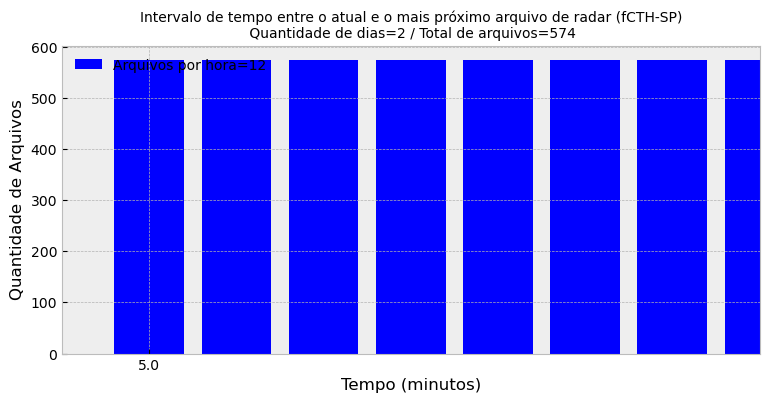

In [27]:
# importa bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

# tamanho da figura
fig, ax = plt.subplots(figsize=(9,4))

# layout do gráfico
plt.style.use('bmh')

# calcula a moda 
# Sample List of Lists
nested_list = dfx_hora.values.tolist()
 
# Flatten using Nested Loops
flattened_list = []
for sublist in nested_list:
    for item in sublist:
        flattened_list.append(item)
moda = st.mode(flattened_list)

# calcula o total de arquivos de radar
tot_files = dfx_tempo['qte_arquivos'].sum()
tot_dias = len(dfx_hora.columns.values)

# plota figura
ax.bar(np.arange(1,9,1), 
       dfx_tempo['qte_arquivos'].tolist(),
       color='blue',
       label=f'Arquivos por hora={int(moda)}')

# configuração dos eixos
xticks = np.arange(1, dfx_tempo.shape[0]+1, 1)
xticklabels = [str(i) for i in dfx_tempo['minutos_entre_arquivo_atual_e_proximo'].tolist()]

ax.set(xlabel='Tempo (minutos)', 
       ylabel='Quantidade de Arquivos',
       title=f'Intervalo de tempo entre o atual e o mais próximo arquivo de radar (fCTH-SP)\n Quantidade de dias={tot_dias} / Total de arquivos={tot_files}',
       xlim=(0,8),
       xticks=xticks,
       xticklabels=xticklabels)

# tamanho da letra do título da figura
ax.title.set_size(10)

# adiciona legenda
ax.legend(loc='best', frameon=False)

# salva figura
plt.savefig('output/minutos_entre_arquivo_atual_e_proximo.png', bbox_inches='tight', dpi=300)

# mostra na tela a figura
plt.show()

In [104]:
np.arange(1,7,1)

array([1, 2, 3, 4, 5, 6])

In [105]:
xticks

array([1, 2, 3, 4, 5, 6, 7, 8])

In [106]:
xticklabels 

['4.7', '4.8', '6.3', '9.4', '9.5', '14.2', '14.4', '18.9']

In [107]:
df_hora_total[0]

hor
00    12
01    12
02    12
03    11
04    12
05    12
06    11
07    13
08    12
09    11
10    13
11    12
12    13
13    13
14    10
15    12
16    12
17    13
18    11
19    13
20    12
21    13
22    11
23    13
Name: ano, dtype: int64

In [108]:
df_hora_total[1]

hor
00     9
01    12
02    12
03    13
04    12
05    12
06    11
07    11
08    13
09    12
10    13
11    12
12    13
13    12
14    11
15    13
16    13
17    11
18    12
19    13
20    12
21    12
22    13
23    11
Name: ano, dtype: int64

In [109]:
df_total['deltaT_min'].unique()

array([ 0. ,  4.7,  9.4, 18.9, 14.2,  9.5,  4.8, 14.4,  6.3])

In [110]:
df_total['deltaT_min'].value_counts()

4.7     3515
9.4      190
14.2      44
0.0       15
18.9       5
4.8        5
9.5        4
14.4       1
6.3        1
Name: deltaT_min, dtype: int64

In [111]:
5*4.7

23.5

In [112]:
df['deltaT_min'].value_counts()

4.7     187
9.4      53
14.2      2
0.0       1
18.9      1
Name: deltaT_min, dtype: int64

In [113]:
4.7*2

9.4

In [114]:
df_hora.index.tolist()

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [115]:
df_hora.values

array([ 8,  9,  9,  9, 12, 10, 11, 11, 10, 11, 10, 10,  8, 11, 11, 11, 10,
       11, 12,  9, 10, 10, 11, 10], dtype=int64)

In [116]:
df.index

DatetimeIndex(['2024-01-03 00:06:54', '2024-01-03 00:11:37',
               '2024-01-03 00:21:03', '2024-01-03 00:25:46',
               '2024-01-03 00:30:29', '2024-01-03 00:35:12',
               '2024-01-03 00:54:05', '2024-01-03 00:58:48',
               '2024-01-03 01:08:14', '2024-01-03 01:12:57',
               ...
               '2024-01-03 23:04:34', '2024-01-03 23:09:17',
               '2024-01-03 23:14:00', '2024-01-03 23:18:44',
               '2024-01-03 23:23:27', '2024-01-03 23:32:53',
               '2024-01-03 23:37:36', '2024-01-03 23:42:19',
               '2024-01-03 23:47:02', '2024-01-03 23:56:28'],
              dtype='datetime64[ns]', name='data', length=244, freq=None)

In [117]:
a = df.index.to_series()
print(type(a))
print(a)

<class 'pandas.core.series.Series'>
data
2024-01-03 00:06:54   2024-01-03 00:06:54
2024-01-03 00:11:37   2024-01-03 00:11:37
2024-01-03 00:21:03   2024-01-03 00:21:03
2024-01-03 00:25:46   2024-01-03 00:25:46
2024-01-03 00:30:29   2024-01-03 00:30:29
                              ...        
2024-01-03 23:32:53   2024-01-03 23:32:53
2024-01-03 23:37:36   2024-01-03 23:37:36
2024-01-03 23:42:19   2024-01-03 23:42:19
2024-01-03 23:47:02   2024-01-03 23:47:02
2024-01-03 23:56:28   2024-01-03 23:56:28
Name: data, Length: 244, dtype: datetime64[ns]


In [118]:
# calcula a diferença em dias, horas, minutos e segundos
# df.index.to_series().diff().dt.seconds.div(60, fill_value=0)
df.index.to_series().diff()

data
2024-01-03 00:06:54               NaT
2024-01-03 00:11:37   0 days 00:04:43
2024-01-03 00:21:03   0 days 00:09:26
2024-01-03 00:25:46   0 days 00:04:43
2024-01-03 00:30:29   0 days 00:04:43
                            ...      
2024-01-03 23:32:53   0 days 00:09:26
2024-01-03 23:37:36   0 days 00:04:43
2024-01-03 23:42:19   0 days 00:04:43
2024-01-03 23:47:02   0 days 00:04:43
2024-01-03 23:56:28   0 days 00:09:26
Name: data, Length: 244, dtype: timedelta64[ns]

In [119]:
dif = df.index[1]-df.index[0]
dif

Timedelta('0 days 00:04:43')

In [120]:
delta = pd.Timestamp( df.index[1]) - pd.Timestamp(df.index[0])
print(delta.components)

Components(days=0, hours=0, minutes=4, seconds=43, milliseconds=0, microseconds=0, nanoseconds=0)


In [121]:
# df.index.to_series().diff().dt.seconds.div(60, fill_value=0)
df.index.to_series().diff().dt

In [122]:
# converte a diferença de tempo para segundos
# df.index.to_series().diff().dt.seconds.div(60, fill_value=0)
df.index.to_series().diff().dt.seconds

data
2024-01-03 00:06:54      NaN
2024-01-03 00:11:37    283.0
2024-01-03 00:21:03    566.0
2024-01-03 00:25:46    283.0
2024-01-03 00:30:29    283.0
                       ...  
2024-01-03 23:32:53    566.0
2024-01-03 23:37:36    283.0
2024-01-03 23:42:19    283.0
2024-01-03 23:47:02    283.0
2024-01-03 23:56:28    566.0
Name: data, Length: 244, dtype: float64

In [123]:
# transforma de segundos para minutos. Para isto divide por 60
# df.index.to_series().diff().dt.seconds.div(60, fill_value=0)
df.index.to_series().diff().dt.seconds.div(60, fill_value=0)

data
2024-01-03 00:06:54    0.000000
2024-01-03 00:11:37    4.716667
2024-01-03 00:21:03    9.433333
2024-01-03 00:25:46    4.716667
2024-01-03 00:30:29    4.716667
                         ...   
2024-01-03 23:32:53    9.433333
2024-01-03 23:37:36    4.716667
2024-01-03 23:42:19    4.716667
2024-01-03 23:47:02    4.716667
2024-01-03 23:56:28    9.433333
Name: data, Length: 244, dtype: float64

In [124]:
df['deltaT_min'].unique()

array([ 0. ,  4.7,  9.4, 18.9, 14.2])

In [125]:
df['deltaT_min'].value_counts()

4.7     187
9.4      53
14.2      2
0.0       1
18.9      1
Name: deltaT_min, dtype: int64